# Fraud Detection Analysis

### Library
Import library yang akan digunakan dalam proses pemodelan

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy import stats
import warnings # for supressing a warnindg when importing large files
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import permutation_importance
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from scipy.stats import uniform, randint, loguniform

### Import Dataset

In [2]:
# Load train dataset
train_beneficiary = pd.read_csv("Data\Train_Beneficiarydata.csv")
train_inpatient = pd.read_csv("Data\Train_Inpatientdata.csv")
train_outpatient = pd.read_csv("Data\Train_Outpatientdata.csv")
train_provider = pd.read_csv("Data\Train_Providerdata.csv")

In [3]:
# Load test dataset
test_beneficiary = pd.read_csv("Data\Test_Beneficiarydata.csv")
test_inpatient = pd.read_csv("Data\Test_Inpatientdata.csv")
test_outpatient = pd.read_csv("Data\Test_Outpatientdata.csv")
test_provider = pd.read_csv("Data\Test_Providerdata.csv")

## Data Understanding

In [4]:
## Check Shape of Datasets

print('Shape of Train_Provider data :',train_provider.shape)
print('Shape of Train_Beneficiary data :',train_beneficiary.shape)
print('Shape of Train_Inpatient data :',train_inpatient.shape)
print('Shape of Train_Outpatient data :',train_outpatient.shape)

print('Shape of Test_Provider data :',test_provider.shape)
print('Shape of Test_Beneficiary data :',test_beneficiary.shape)
print('Shape of Test_Inpatient data :',test_inpatient.shape)
print('Shape of Test_Outpatient data :',test_outpatient.shape)

Shape of Train_Provider data : (5410, 2)
Shape of Train_Beneficiary data : (138556, 25)
Shape of Train_Inpatient data : (40474, 30)
Shape of Train_Outpatient data : (517737, 27)
Shape of Test_Provider data : (1353, 1)
Shape of Test_Beneficiary data : (63968, 25)
Shape of Test_Inpatient data : (9551, 30)
Shape of Test_Outpatient data : (125841, 27)


### Data Checking

##### Provider Data

In [5]:
## Check shape and sample of Train and Test Provider Data

print('Train_Provider Shape:',train_provider.shape)
print('Train_Provider Sample Data:\n',train_provider.head(2),'\n')

print('Test_Provider Shape:',test_provider.shape)
print('Test_Provider Sample Data: \n',test_provider.head(2))

Train_Provider Shape: (5410, 2)
Train_Provider Sample Data:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 

Test_Provider Shape: (1353, 1)
Test_Provider Sample Data: 
    Provider
0  PRV51002
1  PRV51006


In [6]:
# Check duplicated value
print('Duplicated value in Train Provider:',train_provider.duplicated().any())
print('Duplicated value in Test Provider:',test_provider.duplicated().any())

Duplicated value in Train Provider: False
Duplicated value in Test Provider: False


In [7]:
# Check missing value
print('Total missing values in Train Provider :',train_provider.isna().sum().sum())
print('Total missing values in Test Provider :',test_provider.isna().sum().sum())

Total missing values in Train Provider : 0
Total missing values in Test Provider : 0


##### Beneficiary Data

In [8]:
## Check shape and sample of Train Beneficiary Data

print('Train_Beneficiary Shape:',train_beneficiary.shape)
print('Train_Beneficiary Sample:')
train_beneficiary.head(2)

Train_Beneficiary Shape: (138556, 25)
Train_Beneficiary Sample:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [9]:
## Check shape and sample of Test Beneficiary Data

print('Test_Beneficiary Shape:',test_beneficiary.shape)
print('Test_Beneficiary Sample:')
test_beneficiary.head(2)

Test_Beneficiary Shape: (63968, 25)
Test_Beneficiary Sample:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160


In [10]:
# Check duplicated value
print('Duplicated value in Train Beneficiary:',train_beneficiary.duplicated().any())
print('Duplicated value in Test Beneficiary:',test_beneficiary.duplicated().any())

Duplicated value in Train Beneficiary: False
Duplicated value in Test Beneficiary: False


In [11]:
# Check missing value
print('Total missing values in Train Beneficiary :',train_beneficiary.isna().sum().sum())
print('Total missing values in Test Beneficiary :',test_beneficiary.isna().sum().sum())

Total missing values in Train Beneficiary : 137135
Total missing values in Test Beneficiary : 63394


In [12]:
# Check missing value per column in Train Beneficiary Data
train_beneficiary.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [13]:
# Check missing value per column in Test Beneficiary Data
test_beneficiary.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

- We see that missing value is the Date of Death (DOD) columns which means that the beneficiary is still alive. Later we will use this information to create variable that indicate whether the beneficiary is still alive or not.

##### Inpatient Data

In [14]:
## Check shape and sample of Train Inpatient Data

print('Train_Inpatient Shape:',train_inpatient.shape)
print('Train_Inpatient Sample:')
train_inpatient.head(2)

Train_Inpatient Shape: (40474, 30)
Train_Inpatient Sample:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [15]:
## Check shape and sample of Test Inpatient Data

print('Test_Inpatient Shape:',test_inpatient.shape)
print('Test_Inpatient Sample:')
test_inpatient.head(2)

Test_Inpatient Shape: (9551, 30)
Test_Inpatient Sample:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Check duplicated value
print('Duplicated value in Train Inpatient:',train_inpatient.duplicated().any())
print('Duplicated value in Test Inpatient:',test_inpatient.duplicated().any())

Duplicated value in Train Inpatient: False
Duplicated value in Test Inpatient: False


In [17]:
# Check missing value
print('Total missing values in Train Inpatient :',train_inpatient.isna().sum().sum())
print('Total missing values in Test Inpatient :',test_inpatient.isna().sum().sum())

Total missing values in Train Inpatient : 344003
Total missing values in Test Inpatient : 81633


In [18]:
# Check missing value per column in Train Inpatient Data
train_inpatient.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [19]:
# Check missing value per column in Test Inpatient Data
test_inpatient.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

- Some of the missing value make sense. For example, there must be at least 1 diagnosis code. So, if some patient only have 1, it's normal. The same logic applies to procedure code, which maybe some of the patient do not receive medical procedure.

##### Outpatient Data

In [20]:
## Check shape and sample of Train outpatient Data

print('Train_outpatient Shape:',train_outpatient.shape)
print('Train_outpatient Sample:')
train_outpatient.head(2)

Train_outpatient Shape: (517737, 27)
Train_outpatient Sample:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [21]:
## Check shape and sample of Test outpatient Data

print('Test_outpatient Shape:',test_outpatient.shape)
print('Test_outpatient Sample:')
test_outpatient.head(2)

Test_outpatient Shape: (125841, 27)
Test_outpatient Sample:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [22]:
# Check duplicated value
print('Duplicated value in Train outpatient:',train_outpatient.duplicated().any())
print('Duplicated value in Test outpatient:',test_outpatient.duplicated().any())

Duplicated value in Train outpatient: False
Duplicated value in Test outpatient: False


In [23]:
# Check missing value
print('Total missing values in Train outpatient :',train_outpatient.isna().sum().sum())
print('Total missing values in Test outpatient :',test_outpatient.isna().sum().sum())

Total missing values in Train outpatient : 8093719
Total missing values in Test outpatient : 1968014


In [24]:
# Check missing value per column in Train outpatient Data
train_outpatient.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [25]:
# Check missing value per column in Test outpatient Data
test_outpatient.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

- Some of the missing value make sense. For example, there must be at least 1 diagnosis code. So, if some patient only have 1, it's normal. The same logic applies to procedure code, which maybe some of the patient do not receive medical procedure.

## Data Preparation

#### Beneficiary Data

Change `County` Column Names to `Country`

In [26]:
train_beneficiary.rename(columns = {'County':'Country'}, inplace = True)
test_beneficiary.rename(columns = {'County':'Country'}, inplace = True)

##### Decoding the Chronic Condition

In [27]:
# Replacing 2 with 0 for chronic conditions ,that means chronic condition No is 0 and yes is 1

train_beneficiary = train_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

train_beneficiary = train_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

test_beneficiary = test_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

test_beneficiary = test_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

##### Create Age Column

In [28]:
# Create Age Column
train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'] , format = '%Y-%m-%d')
train_beneficiary['DOD'] = pd.to_datetime(train_beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
train_beneficiary['Age'] = round(((train_beneficiary['DOD'] - train_beneficiary['DOB']).dt.days)/365)

test_beneficiary['DOB'] = pd.to_datetime(test_beneficiary['DOB'] , format = '%Y-%m-%d')
test_beneficiary['DOD'] = pd.to_datetime(test_beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
test_beneficiary['Age'] = round(((test_beneficiary['DOD'] - test_beneficiary['DOB']).dt.days)/365)

In [29]:
print('Maximum DOD in Train Beneficiary:', train_beneficiary['DOD'].max())
print('Maximum DOD in Test Beneficiary:', test_beneficiary['DOD'].max())

Maximum DOD in Train Beneficiary: 2009-12-01 00:00:00
Maximum DOD in Test Beneficiary: 2009-12-01 00:00:00


In [30]:
# As we see that last DOD value is 2009-12-01 , which means Beneficiary Details data is of year 2009.
# So, we will calculate age of other beneficiaries for year 2009.

train_beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - train_beneficiary['DOB']).dt.days)/365),
                                 inplace=True)

test_beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - test_beneficiary['DOB']).dt.days)/365),
                                 inplace=True)

##### Create Status `WhetherDead` to tell whether a beneficiary is dead or not

In [31]:
# Create a new variable 'WhetherDead' with flag 1 means Dead and 0 means not Dead

train_beneficiary.loc[train_beneficiary.DOD.isna(),'WhetherDead'] = 0
train_beneficiary.loc[train_beneficiary.DOD.notna(),'WhetherDead'] = 1

test_beneficiary.loc[test_beneficiary.DOD.isna(),'WhetherDead'] = 0
test_beneficiary.loc[test_beneficiary.DOD.notna(),'WhetherDead'] = 1

#### Inpatient Data

##### Create `AdmitForDays` column

In [32]:
## As patient can be admitted for only for 1 day, we will add 1 to the difference of Discharge Date and Admission Date 

train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'] , format = '%Y-%m-%d')
train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'],format = '%Y-%m-%d')
train_inpatient['AdmitForDays'] = ((train_inpatient['DischargeDt'] - train_inpatient['AdmissionDt']).dt.days)+1


test_inpatient['AdmissionDt'] = pd.to_datetime(test_inpatient['AdmissionDt'] , format = '%Y-%m-%d')
test_inpatient['DischargeDt'] = pd.to_datetime(test_inpatient['DischargeDt'],format = '%Y-%m-%d')
test_inpatient['AdmitForDays'] = ((test_inpatient['DischargeDt'] - test_inpatient['AdmissionDt']).dt.days)+1

In [33]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',train_inpatient.AdmitForDays.min())
print('Max AdmitForDays Train:- ',train_inpatient.AdmitForDays.max())

print('Min AdmitForDays Test:- ',test_inpatient.AdmitForDays.min())
print('Max AdmitForDays Test:- ',test_inpatient.AdmitForDays.max())

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


##### Create `Admitted?` column to indicate if a patient is admitted to the hospital

In [34]:
train_outpatient['Admitted?'] = "0"
test_outpatient['Admitted?'] = "0"

#### Outpatient Data

##### Create `Admitted?` column to indicate if a patient is admitted to the hospital

In [35]:
train_inpatient['Admitted?'] = "1"
test_inpatient['Admitted?'] = "1"

#### Inpatient and Outpatient Data Merging

In [36]:
print('Shape of Train Inpatient data :',train_inpatient.shape)
print('Shape of Train Outpatient data :',train_outpatient.shape)
print('Shape of Test Inpatient data :',test_inpatient.shape)
print('Shape of Test Outpatient data :',test_outpatient.shape)

Shape of Train Inpatient data : (40474, 32)
Shape of Train Outpatient data : (517737, 28)
Shape of Test Inpatient data : (9551, 32)
Shape of Test Outpatient data : (125841, 28)


Merging Inpatient and Outpatient dataset on the basis of common columns

In [37]:
# Merging the IP and OP dataset on the basis of common columns
common_cols = [col for col in train_inpatient.columns if col in train_outpatient.columns]
len(common_cols)
train_allpatient = pd.merge(left=train_inpatient, right=train_outpatient, left_on=common_cols, right_on=common_cols, how="outer")
train_allpatient.shape

(558211, 32)

In [38]:
# Merging the IP and OP dataset on the basis of common columns
common_cols = [col for col in test_inpatient.columns if col in test_outpatient.columns]
len(common_cols)
test_allpatient = pd.merge(left=test_inpatient, right=test_outpatient, left_on=common_cols, right_on=common_cols, how="outer")
test_allpatient.shape

(135392, 32)

In [39]:
print('train_allpatient',train_allpatient.shape)
print('test_allpatient',test_allpatient.shape)

train_allpatient (558211, 32)
test_allpatient (135392, 32)


### Allpatient and Beneficiary Data Merging

In [40]:
## Lets merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
train_allpatient_details = pd.merge(train_allpatient,train_beneficiary,left_on='BeneID',right_on='BeneID',how='outer')

test_allpatient_details = pd.merge(test_allpatient,test_beneficiary,left_on='BeneID',right_on='BeneID',how='outer')

In [41]:
print('Shape of All Patient Details Train : ',train_allpatient_details.shape)
train_allpatient_details.head()

Shape of All Patient Details Train :  (558211, 58)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,0,1,1,36000,3204,60,70,67.0,0.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,0,1,1,36000,3204,60,70,67.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,0,0,1,1,5000,1068,250,320,96.0,0.0
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaT,...,0,0,1,1,5000,1068,250,320,96.0,0.0


In [42]:
print('Shape of All Patient Details Test : ',test_allpatient_details.shape)
test_allpatient_details.head()

Shape of All Patient Details Test :  (135392, 58)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,1,0,0,0,21260,2136,120,100,72.0,0.0
1,BENE11014,CLM731858,2009-12-16,2009-12-16,PRV56558,60,PHY331420,PHY331420,PHY428520,NaT,...,1,0,0,0,21260,2136,120,100,72.0,0.0
2,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,1,0,1,1,22000,2136,1400,840,70.0,0.0
3,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,1,0,0,0,2000,1068,0,0,72.0,0.0
4,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,1,1,0,0,23650,2136,40,0,65.0,0.0


### Potential Fraud and Provider with Patient Data Merging

In [43]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

train_provider_with_patients = pd.merge(train_provider,train_allpatient_details,on='Provider')
test_provider_with_patients = pd.merge(test_provider,test_allpatient_details,on='Provider')

In [44]:
print("Shape of Train Provider with Patient Details data :-",train_provider_with_patients.shape)
train_provider_with_patients.head()

Shape of Train Provider with Patient Details data :- (558211, 59)


,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,1,0,0,0,2020,1068,6700,2700,74.0,0.0
1,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,0,0,1,36000,1068,3520,140,69.0,0.0
2,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,0,0,0,0,95000,2136,2270,900,72.0,0.0
3,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70,PHY402512,NaN,NaN,...,1,1,0,0,5000,1068,370,70,91.0,0.0
4,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1,0,1,0,3000,1068,0,0,75.0,0.0


In [45]:
print("Shape of Test Provider with Patient Details data :-",test_provider_with_patients.shape)
test_provider_with_patients.head(2)

Shape of Test Provider with Patient Details data :- (135392, 58)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,NaT,...,1,0,0,0,22000,3204,1020,910,89.0,0.0
1,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,NaT,...,1,0,0,0,22000,3204,1020,910,89.0,0.0


In [46]:
### Lets check missing value percentage in full datasets
print('Percent missing values in Train Provider with patient details data :\n')
train_provider_with_patients.isnull().sum()*100/len(train_provider_with_patients)

Percent missing values in Train Provider with patient details data :



Provider                             0.000000
PotentialFraud                       0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                

In [47]:
print('Percent missing values in Test Provider with patient details data :\n')
test_provider_with_patients.isnull().sum()*100/len(test_provider_with_patients)

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                

In [48]:
train_provider_with_patients.dtypes

Provider                                   object
PotentialFraud                             object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object


In [49]:
test_provider_with_patients.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


### Entire Dataset

Create `Claim_Period` columns

In [50]:
## As patient can be admitted for only for 1 day, we will add 1 to the difference of Discharge Date and Admission Date 

train_provider_with_patients['ClaimStartDt'] = pd.to_datetime(train_provider_with_patients['ClaimStartDt'] , format = '%Y-%m-%d')
train_provider_with_patients['ClaimEndDt'] = pd.to_datetime(train_provider_with_patients['ClaimEndDt'],format = '%Y-%m-%d')
train_provider_with_patients['Claim_Period'] = ((train_provider_with_patients['ClaimEndDt'] - train_provider_with_patients['ClaimStartDt']).dt.days)+1


test_provider_with_patients['ClaimStartDt'] = pd.to_datetime(test_provider_with_patients['ClaimStartDt'] , format = '%Y-%m-%d')
test_provider_with_patients['ClaimEndDt'] = pd.to_datetime(test_provider_with_patients['ClaimEndDt'],format = '%Y-%m-%d')
test_provider_with_patients['Claim_Period'] = ((test_provider_with_patients['ClaimEndDt'] - test_provider_with_patients['ClaimStartDt']).dt.days)+1

Create `Patient_Risk_Score` columns

In [51]:
train_provider_with_patients.iloc[:,-18:-7]

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,1,1,1,1,1,1,1,1,0,0,0
1,0,1,1,0,0,1,1,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,1,0,0
4,1,1,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
558206,0,0,0,0,0,0,1,0,0,0,0
558207,1,0,0,0,0,1,1,1,1,1,0
558208,0,0,0,0,0,0,0,0,0,0,0
558209,0,0,0,0,0,0,1,1,0,0,0


In [52]:
test_provider_with_patients.iloc[:,-18:-7]

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,0,1,1,0,1,1,1,1,0,0,0
1,0,1,1,0,1,1,1,1,0,0,0
2,0,1,1,0,1,1,1,1,0,0,0
3,1,0,0,0,1,0,1,1,1,0,0
4,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
135387,0,1,0,0,0,1,1,1,0,0,0
135388,0,0,0,0,0,1,0,1,0,0,0
135389,0,0,0,0,0,1,0,1,0,0,0
135390,1,0,1,0,1,0,1,1,0,0,0


In [53]:
train_provider_with_patients["Patient_Risk_Score"] = train_provider_with_patients.iloc[:,-18:-7].sum(axis=1)
test_provider_with_patients["Patient_Risk_Score"] = test_provider_with_patients.iloc[:,-18:-7].sum(axis=1)

Adding `Total Unique Claim Admit Codes` used by a `PROVIDER`

Reasoning : The idea behind adding this feature is to see how many unique number of Claim Admit Diagnosis Codes used by the Provider.
As there may be a pattern that if a provider has used so many Admit Diagnosis Codes then it might increases or decreases the chances of fraud.

In [54]:
train_provider_with_patients['Tot_Admit_DCodes'] = train_provider_with_patients.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')
test_provider_with_patients['Tot_Admit_DCodes'] = test_provider_with_patients.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [55]:
train_provider_with_patients["Tot_Admit_DCodes"].describe()

count    558211.000000
mean        109.227258
std         112.083238
min           0.000000
25%          28.000000
50%          72.000000
75%         152.000000
max         582.000000
Name: Tot_Admit_DCodes, dtype: float64

Adding `Total Unique Number of Diagnosis Group Codes` used by a `PROVIDER`

Reasoning : The idea behind adding this feature is to see how many unique Diagnosis Group Codes used by the Provider.
As there may be a pattern that if a provider has used so many Diagnosis Group Codes then it might increases or decreases the chances of fraud.

In [56]:
train_provider_with_patients['Tot_DGrpCodes'] = train_provider_with_patients.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')
test_provider_with_patients['Tot_DGrpCodes'] = test_provider_with_patients.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

In [57]:
train_provider_with_patients["Tot_DGrpCodes"].describe()

count    558211.000000
mean         22.234648
std          46.571715
min           0.000000
25%           0.000000
50%           0.000000
75%          21.000000
max         330.000000
Name: Tot_DGrpCodes, dtype: float64

Adding `Total Reimbursement Amount` for all patients

In [58]:
# create new feature total reimbursement amount for inpatient and outpatient
train_provider_with_patients['IP_OP_TotalReimbursementAmt'] = train_provider_with_patients['IPAnnualReimbursementAmt'] + train_provider_with_patients['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
train_provider_with_patients['IP_OP_AnnualDeductibleAmt'] = train_provider_with_patients['IPAnnualDeductibleAmt'] + train_provider_with_patients['OPAnnualDeductibleAmt']

test_provider_with_patients['IP_OP_TotalReimbursementAmt'] = test_provider_with_patients['IPAnnualReimbursementAmt'] + test_provider_with_patients['OPAnnualReimbursementAmt']
test_provider_with_patients['IP_OP_AnnualDeductibleAmt'] = test_provider_with_patients['IPAnnualDeductibleAmt'] + test_provider_with_patients['OPAnnualDeductibleAmt']

Function for creating new feature using `group_by` and taking `mean` or `sum`

In [59]:
def create_feature_using_groupby(Train_df, Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''
    
    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        print(new_col_name)
        Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Train_df, Test_df

Adding Aggregated Features based on `Provider`
- As Providers submit the claim, they are mainly associated with the fraudulent activity. If the average claim amount or claim period is high for a provider, this is suspicious.

In [60]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'AdmitForDays', 'Claim_Period', 'Patient_Risk_Score']

train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['Provider'], columns, 'mean')

PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_Age
PerProvider_mean_NoOfMonths_PartACov
PerProvider_mean_NoOfMonths_PartBCov
PerProvider_mean_AdmitForDays
PerProvider_mean_Claim_Period
PerProvider_mean_Patient_Risk_Score


Adding Aggregated Features based on `Beneficiaries`
- Beneficiaries also associated with fraudulent activity. If the average claim amount is high for a beneficiary then this is suspicious

In [61]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'AdmitForDays', 'Claim_Period', 'Patient_Risk_Score']

train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['BeneID'], columns, 'mean')

PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Age
PerBeneID_mean_NoOfMonths_PartACov
PerBeneID_mean_NoOfMonths_PartBCov
PerBeneID_mean_AdmitForDays
PerBeneID_mean_Claim_Period
PerBeneID_mean_Patient_Risk_Score


Adding Aggregated Features based on `Physicians`
- High amounts for a physician are suspicious.

In [62]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'AdmitForDays', 'Claim_Period', 'Patient_Risk_Score']
train_provider_with_patients,test_provider_with_patients =  create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['AttendingPhysician'], columns, 'mean')
train_provider_with_patients,test_provider_with_patients =  create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['OperatingPhysician'], columns, 'mean')
train_provider_with_patients,test_provider_with_patients =  create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['OtherPhysician'], columns, 'mean')

PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbursementAmt
PerAttendingPhysician_mean_OPAnnualDeductibleAmt
PerAttendingPhysician_mean_Age
PerAttendingPhysician_mean_NoOfMonths_PartACov
PerAttendingPhysician_mean_NoOfMonths_PartBCov
PerAttendingPhysician_mean_AdmitForDays
PerAttendingPhysician_mean_Claim_Period
PerAttendingPhysician_mean_Patient_Risk_Score
PerOperatingPhysician_mean_InscClaimAmtReimbursed
PerOperatingPhysician_mean_DeductibleAmtPaid
PerOperatingPhysician_mean_IPAnnualReimbursementAmt
PerOperatingPhysician_mean_IPAnnualDeductibleAmt
PerOperatingPhysician_mean_OPAnnualReimbursementAmt
PerOperatingPhysician_mean_OPAnnualDeductibleAmt
PerOperatingPhysician_mean_Age
PerOperatingPhysician_mean_NoOfMonths_PartACov
PerOperatingPhysician_mean_NoOfMonths_PartBCov
PerOperatingPhysician_mean_Adm

Adding Aggregated Features based on `Diagnosis Codes`
- To compare the average of costs between patients who performed the same tests

In [63]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'AdmitForDays', 'Claim_Period', 'Patient_Risk_Score']

train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['DiagnosisGroupCode'], columns, 'mean')
train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['ClmAdmitDiagnosisCode'], columns, 'mean')

PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed
PerDiagnosisGroupCode_mean_DeductibleAmtPaid
PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_Age
PerDiagnosisGroupCode_mean_NoOfMonths_PartACov
PerDiagnosisGroupCode_mean_NoOfMonths_PartBCov
PerDiagnosisGroupCode_mean_AdmitForDays
PerDiagnosisGroupCode_mean_Claim_Period
PerDiagnosisGroupCode_mean_Patient_Risk_Score
PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed
PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid
PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_Age
PerClmAdmitDiagnosisCode_mean_NoOfMonths_PartACov
PerClmAdmitDiagnosisCode_mean_NoOfMonths_PartBCov
Per

Adding Aggregated Features based on `Procudre Codes`
- To compare the average of costs between patients who gone through the same procedure

In [64]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'AdmitForDays', 'Claim_Period', 'Patient_Risk_Score']

train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['ClmProcedureCode_1'], columns, 'mean')
train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['ClmProcedureCode_2'], columns, 'mean')
train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['ClmProcedureCode_3'], columns, 'mean')
train_provider_with_patients,test_provider_with_patients = create_feature_using_groupby(train_provider_with_patients, test_provider_with_patients, ['ClmProcedureCode_4'], columns, 'mean')

PerClmProcedureCode_1_mean_InscClaimAmtReimbursed
PerClmProcedureCode_1_mean_DeductibleAmtPaid
PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_Age
PerClmProcedureCode_1_mean_NoOfMonths_PartACov
PerClmProcedureCode_1_mean_NoOfMonths_PartBCov
PerClmProcedureCode_1_mean_AdmitForDays
PerClmProcedureCode_1_mean_Claim_Period
PerClmProcedureCode_1_mean_Patient_Risk_Score
PerClmProcedureCode_2_mean_InscClaimAmtReimbursed
PerClmProcedureCode_2_mean_DeductibleAmtPaid
PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_Age
PerClmProcedureCode_2_mean_NoOfMonths_PartACov
PerClmProcedureCode_2_mean_NoOfMonths_PartBCov
PerClmProcedureCode_2_mean_Adm

Removing columns that are no longer required

In [65]:
# Filling Nulls in Deductible Amt Paid by Patient
train_provider_with_patients['DeductibleAmtPaid'].fillna(value=0, inplace=True)
test_provider_with_patients['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [66]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_provider_with_patients['Gender'] = train_provider_with_patients['Gender'].apply(lambda val: 0 if val == 2 else val)
train_provider_with_patients['PotentialFraud'] = train_provider_with_patients['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)

test_provider_with_patients['Gender'] = test_provider_with_patients['Gender'].apply(lambda val: 0 if val == 2 else val)

In [67]:
# Encoding the Categorical features
train_provider_with_patients = pd.get_dummies(train_provider_with_patients,columns=['Gender', 'Race', 'Admitted?', 'WhetherDead'], drop_first=True)
test_provider_with_patients = pd.get_dummies(test_provider_with_patients,columns=['Gender', 'Race', 'Admitted?', 'WhetherDead'], drop_first=True)

Because our goal is to predict healthcare provider fraud. So, group by the provider and take sum to create a feature corresponding to each provider.

In [68]:
Final_Dataset_Provider_Train = train_provider_with_patients.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum', numeric_only = True)
Final_Dataset_Provider_Test  = test_provider_with_patients.groupby(['Provider'],as_index=False).agg('sum', numeric_only = True)

## Exploratory Data Analysis

In [69]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


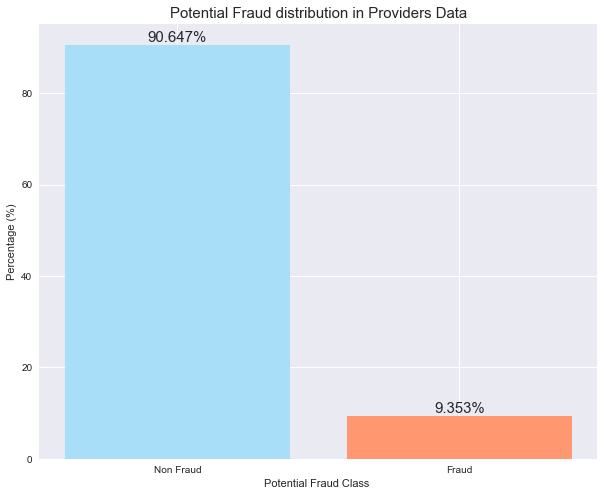

In [70]:
# Plotting the percentage of fraud and non-fraud in the providers data
count_classes = round(pd.value_counts(train_provider['PotentialFraud'], sort = True)*100/len(train_provider),3)
LABELS = ["Non Fraud", "Fraud"]

plt.figure(figsize=(10,8))
p1 = plt.bar(LABELS, count_classes, color=["#a9def9","#ff9770"])

plt.title("Potential Fraud distribution in Providers Data", fontsize = 15)
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Percentage (%)")

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()

- This is a `highly imbalanced dataset`. There are 10% fraudulent providers and 90% non-fraudulent providers. Note that this is based on the provider data not the claims data

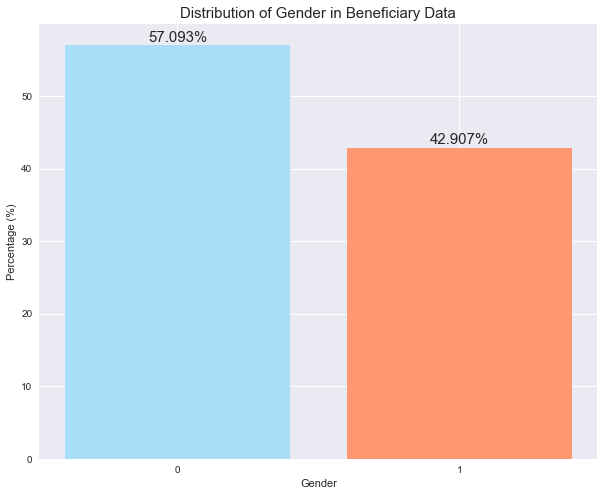

In [71]:
# Distribution of Gender (Beneficiary Data)
plt.figure(figsize=(10,8))

count_classes = round(pd.value_counts(train_beneficiary['Gender'], sort = True)*100/len(train_beneficiary),3)
LABELS = ["0", "1"]

p1 = plt.bar(LABELS, count_classes, color=["#a9def9","#ff9770"])

plt.title("Distribution of Gender in Beneficiary Data", fontsize = 15)
plt.xticks(range(2), LABELS)
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()

- The ratio of genders in beneficiary data is `Gender_0 : Gender_1 = 57% : 43%`

Text(0.5, 1.0, 'Distribution of Beneficiaries Age')

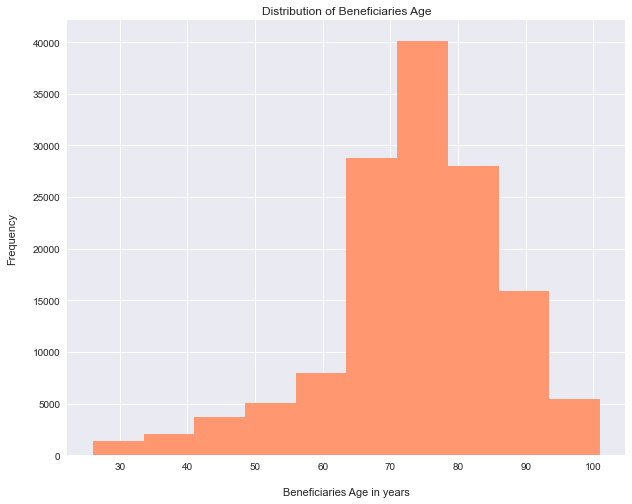

In [72]:
plt.figure(figsize=(10,8))
train_beneficiary["Age"].plot(kind='hist', color="#ff9770")
# Providing the labels and title to the graph
plt.xlabel("\nBeneficiaries Age in years")
plt.ylabel("Frequency\n")
plt.title("Distribution of Beneficiaries Age")

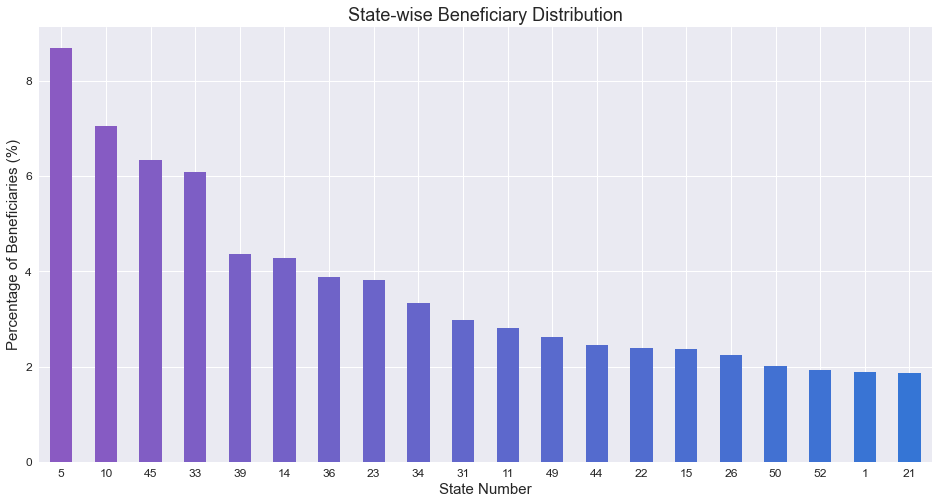

In [73]:
# Distribution of State (Beneficiary Data)
count_states = pd.value_counts(train_beneficiary['State'], sort = True).iloc[:20]

(count_states*100/len(train_beneficiary)).plot(kind = 'bar', rot=0, figsize=(16,8), fontsize=12, 
    color=get_color_gradient("#8A5AC2", "#3575D5", len(count_states)))

plt.title("State-wise Beneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries (%)",fontsize=15)
plt.show()

- The top 20 states in terms of the beneficiary count are shown in the above picture.
- States with codes 5, 10, 45, 33, and 39 are the top 5 states.
- 8.7% of the beneficiaries belong to state 5.

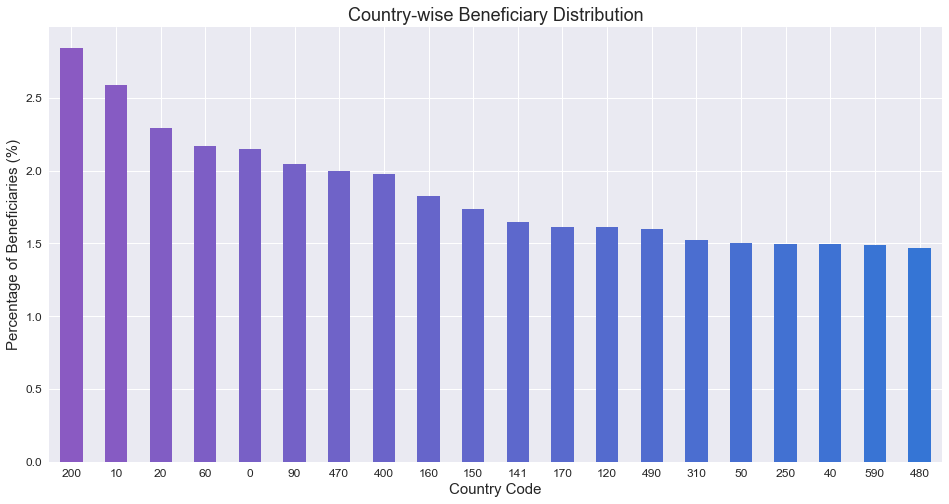

In [74]:
# Distribution of Country (Beneficiary Data)
count_country = pd.value_counts(train_beneficiary['Country'], sort = True).iloc[:20]

(count_country*100/len(train_beneficiary)).plot(kind = 'bar', rot=0, figsize=(16,8), fontsize=12, 
    color=get_color_gradient("#8A5AC2", "#3575D5", len(count_country)))

plt.title("Country-wise Beneficiary Distribution",fontsize=18)
plt.xlabel("Country Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries (%)",fontsize=15)
plt.show()

- The top 20 countries in terms of the beneficiary count are shown in the above picture.
- Countries with codes 200, 10, 20, 60, and 0 are the top 5 states.
- 2.85% of the beneficiaries belong to country code 200.

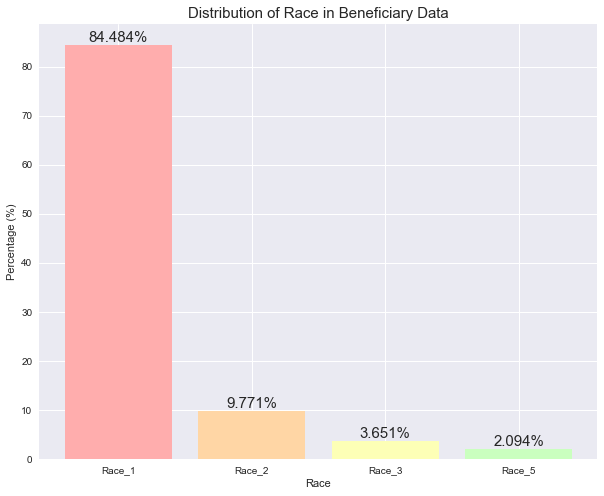

In [75]:
# Distribution of Gender (Beneficiary Data)
plt.figure(figsize=(10,8))

count_classes = round(pd.value_counts(train_beneficiary['Race'], sort = True)*100/len(train_beneficiary),3)
LABELS = ["Race_1", "Race_2", "Race_3", "Race_5"]

p1 = plt.bar(LABELS, count_classes, color=["#ffadad", "#ffd6a5", "#fdffb6", "#caffbf"])

plt.title("Distribution of Race in Beneficiary Data", fontsize = 15)
plt.xticks(range(len(LABELS)), LABELS)
plt.xlabel("Race")
plt.ylabel("Percentage (%)")

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()

- Race 1 is the most in terms of beneficiary count.
- 85% of the beneficiaries belong to race 1.
- There is no race 4 in the dataset.

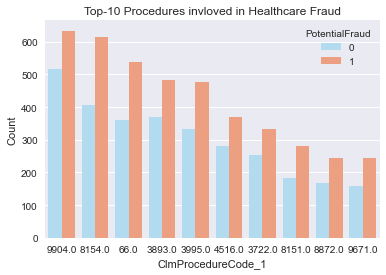

In [76]:
ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=train_provider_with_patients
              ,order=train_provider_with_patients.ClmProcedureCode_1.value_counts().iloc[:10].index
              ,palette=["#a9def9","#ff9770"])

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
plt.ylabel("Count")

plt.show()

From the above plot, we can say that Procedure `9904,8154,66` are top procedures. <br> 
Distribution of fraud and non fraud count shows suspicious transactions involved in them.

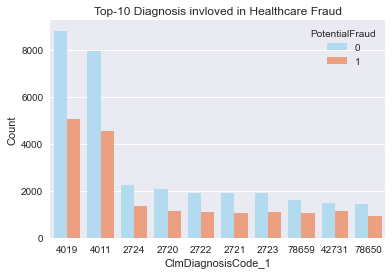

In [77]:
ax=sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=train_provider_with_patients
              ,order=train_provider_with_patients.ClmDiagnosisCode_1.value_counts().iloc[:10].index
              ,palette=["#a9def9","#ff9770"])

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.ylabel("Count")

plt.show()

From the above plot,we can say that diagnosis `4019,4011,2724` are top diagnosis. <br>
Distribution of fraud and non fraud count shows suspicious transactions involved in them.

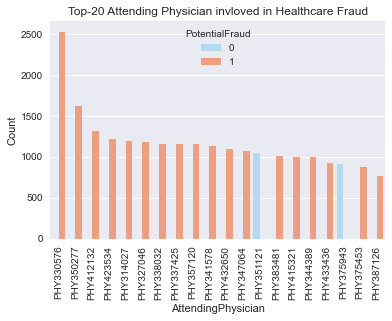

In [78]:
ax=sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=train_provider_with_patients
              ,order=train_provider_with_patients.AttendingPhysician.value_counts().iloc[:20].index
              ,palette=["#a9def9","#ff9770"])

plt.title('Top-20 Attending Physician invloved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.ylabel("Count")

plt.show()

In the above plot,we see count of involvement of attending physicians and flags the nature of provider where they are working is whether fraud or non fraud.

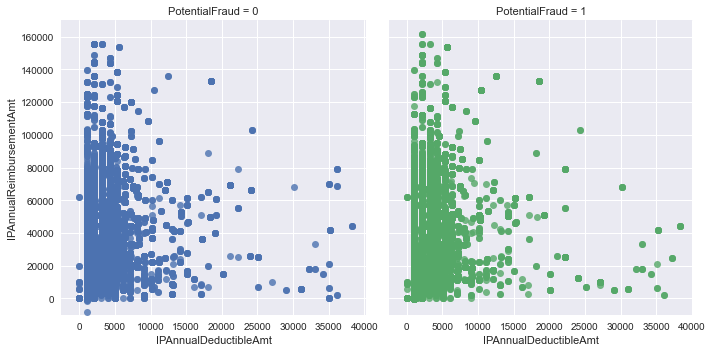

In [79]:
# IPAnnualDeductibleAmt Vs IPAnnualReimbursementAmt Fraud and non Fraud Categories
sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=train_provider_with_patients).set(ylim=(-10000, None)).set(xlim=(-2500,None))

As we see in the above graph, `there is no visible difference` in IPAnnualDeductibleAmt and IPAnnualReimbursementAmt between the Fraud and Non Fraud

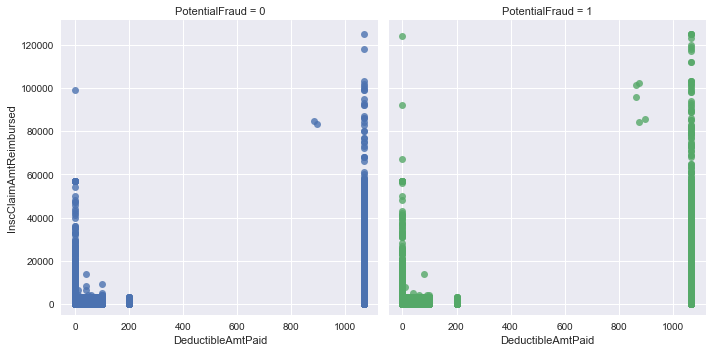

In [80]:
# DeductibleAmtPaid Vs InsClaimAmtReimbursed in Fraud and non Fraud Categories
sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=train_provider_with_patients).set(ylim=(-5000, None)).set(xlim=(-50,None))

As we see in the above graph, `there is no visible difference` in DeductibleAmtPaid and InsClaimAmtReimbursed.

(0.0, 120000.0)

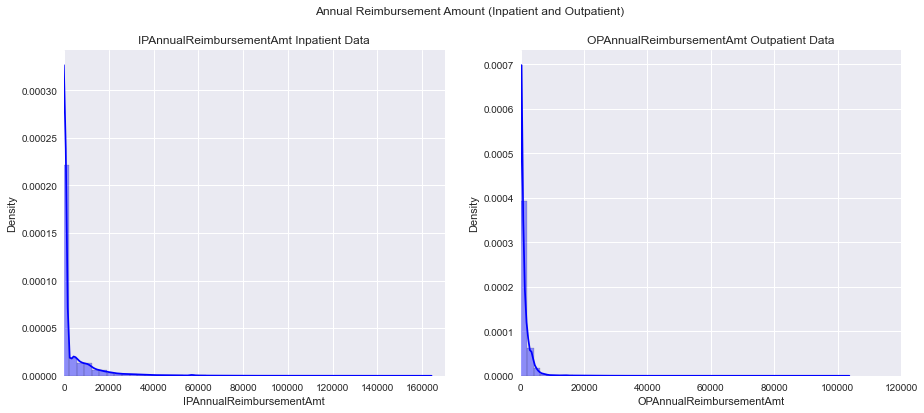

In [81]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Annual Reimbursement Amount (Inpatient and Outpatient)')
sns.distplot(train_beneficiary['IPAnnualReimbursementAmt'], hist=True, kde=True, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'}, ax= axes[0])
axes[0].set_title("IPAnnualReimbursementAmt Inpatient Data")
axes[0].set_xlim(0,170000)

sns.distplot(train_beneficiary['OPAnnualReimbursementAmt'], hist=True, kde=True, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'}, ax= axes[1])
axes[1].set_title("OPAnnualReimbursementAmt Outpatient Data")
axes[1].set_xlim(0,120000)

- The total annual reimbursement amount for inpatient is 507.162.970 and outpatient is 179.876.080. The inpatient reimbursement amount is 2,81 times the outpatient amount.
There are some outliers in both inpatient and outpatient as the tail of both the distributions is flat with high value.

(0.0, 15000.0)

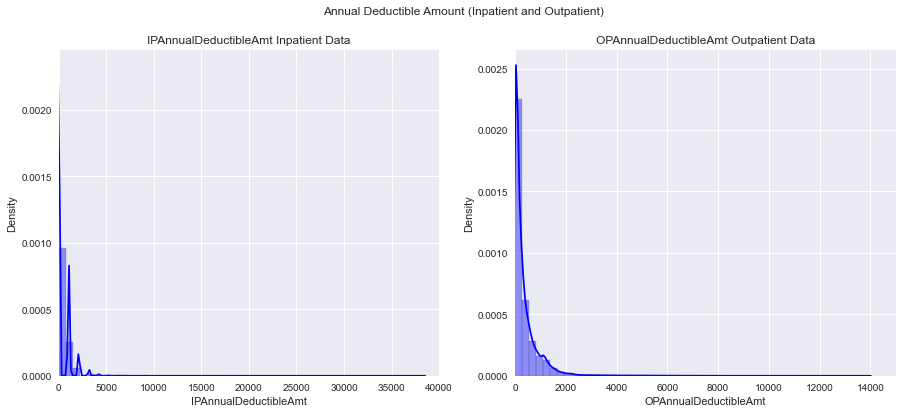

In [82]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Annual Deductible Amount (Inpatient and Outpatient)')
sns.distplot(train_beneficiary['IPAnnualDeductibleAmt'], hist=True, kde=True, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'}, ax= axes[0])
axes[0].set_title("IPAnnualDeductibleAmt Inpatient Data")
axes[0].set_xlim(0,40000)

sns.distplot(train_beneficiary['OPAnnualDeductibleAmt'], hist=True, kde=True, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'}, ax= axes[1])
axes[1].set_title("OPAnnualDeductibleAmt Outpatient Data")
axes[1].set_xlim(0,15000)

- The total annual deductible amount for inpatient is 55.401.242 and outpatient is 52.335.131.
- In both of the datasets there exists some outliers with high value.

## Modelling - LinearSVM with Default Values

Default Value of LinearSVC is C = 1.0

In [83]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

#### Creating sets of input features and target features (Always Run Before Doing Another Modelling)

In [169]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

In [170]:
robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

### Without Oversampling

- Training:Test = 80:20

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, stratify=y, random_state=10820034)

In [172]:
lsvc = LinearSVC(random_state=777)
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score:", score)

Score: 0.9297597042513863


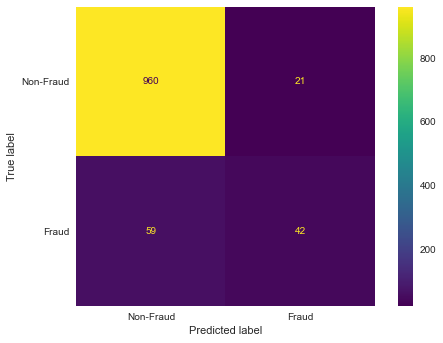

In [173]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Non-Fraud", "Fraud"])

cm_display.plot()
plt.grid(False)
plt.show()

In [174]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       981
           1       0.67      0.42      0.51       101

    accuracy                           0.93      1082
   macro avg       0.80      0.70      0.74      1082
weighted avg       0.92      0.93      0.92      1082



In [175]:
print("AUC Score:", roc_auc_score(y_test,y_pred))

AUC Score: 0.6972174281648348


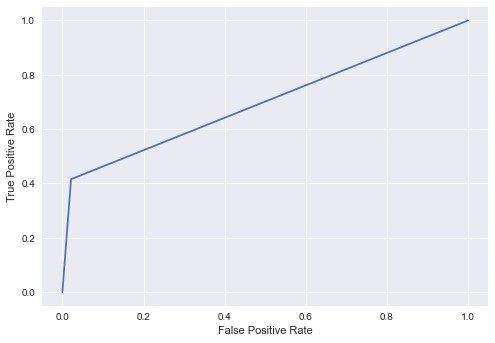

In [176]:
plot_roc_curve(y_test, y_pred)

- Training:Test = 75:25

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, stratify=y, random_state=10820034)

In [178]:
lsvc = LinearSVC(random_state=777)
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score:", score)

Score: 0.9132363815627311


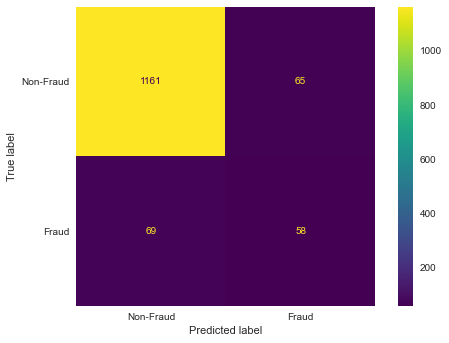

In [179]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Non-Fraud", "Fraud"])

cm_display.plot()
plt.grid(False)
plt.show()

In [180]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1226
           1       0.47      0.46      0.46       127

    accuracy                           0.90      1353
   macro avg       0.71      0.70      0.70      1353
weighted avg       0.90      0.90      0.90      1353



In [181]:
print("AUC Score:", roc_auc_score(y_test,y_pred))

AUC Score: 0.7018374844253767


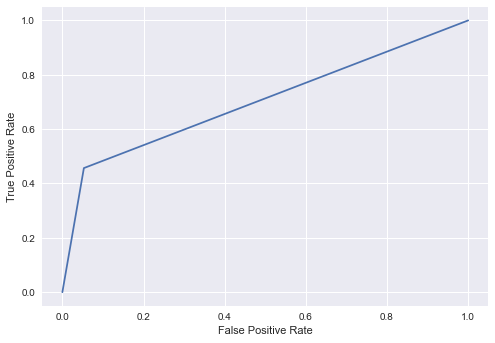

In [182]:
plot_roc_curve(y_test, y_pred)

- Training:Test = 70:30

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=10820034)

In [184]:
lsvc = LinearSVC(random_state=777)
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score:", score)

Score: 0.9133879059941906


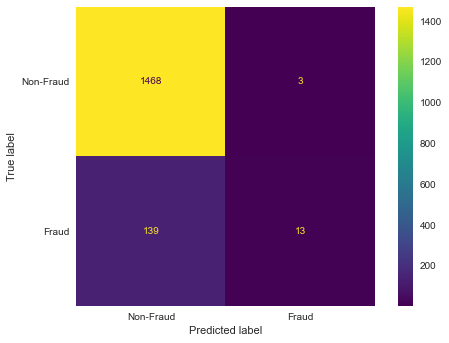

In [185]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Non-Fraud", "Fraud"])

cm_display.plot()
plt.grid(False)
plt.show()

In [186]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1471
           1       0.81      0.09      0.15       152

    accuracy                           0.91      1623
   macro avg       0.86      0.54      0.55      1623
weighted avg       0.90      0.91      0.88      1623



In [187]:
print("AUC Score:", roc_auc_score(y_test,y_pred))

AUC Score: 0.5417434434147912


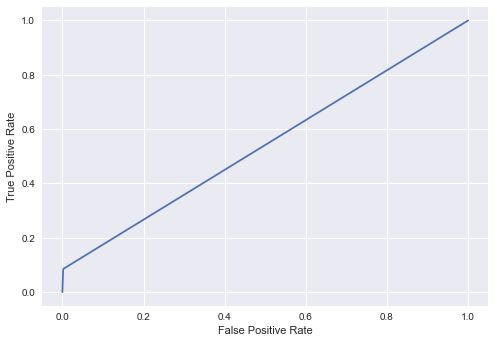

In [188]:
plot_roc_curve(y_test, y_pred)

### With Oversampling

- Training:Test = 80:20

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, stratify=y, random_state=10820034)

In [190]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3923, 1: 405})
Resample dataset shape Counter({0: 3923, 1: 3923})


In [191]:
lsvc = LinearSVC(random_state=777)
lsvc.fit(X_smote, y_smote)
score = lsvc.score(X_smote, y_smote)
print("Score:", score)

Score: 0.8322712210043334


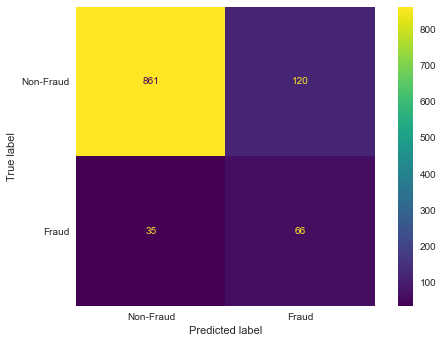

In [192]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Non-Fraud", "Fraud"])

cm_display.plot()
plt.grid(False)
plt.show()

In [193]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       981
           1       0.35      0.65      0.46       101

    accuracy                           0.86      1082
   macro avg       0.66      0.77      0.69      1082
weighted avg       0.90      0.86      0.87      1082



In [194]:
print("AUC Score:", roc_auc_score(y_test,y_pred))

AUC Score: 0.7655705937566234


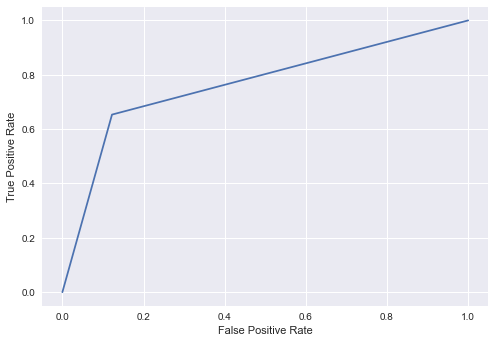

In [195]:
plot_roc_curve(y_test, y_pred)

- Training:Test = 75:25

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, stratify=y, random_state=10820034)

In [197]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3678, 1: 379})
Resample dataset shape Counter({0: 3678, 1: 3678})


In [198]:
lsvc = LinearSVC(random_state=777)
lsvc.fit(X_smote, y_smote)
score = lsvc.score(X_smote, y_smote)
print("Score:", score)

Score: 0.8269439912996194


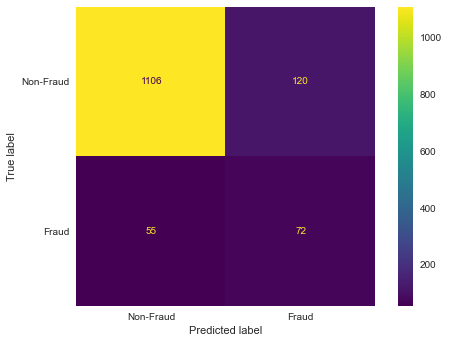

In [199]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Non-Fraud", "Fraud"])

cm_display.plot()
plt.grid(False)
plt.show()

In [200]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1226
           1       0.38      0.57      0.45       127

    accuracy                           0.87      1353
   macro avg       0.66      0.73      0.69      1353
weighted avg       0.90      0.87      0.88      1353



In [201]:
print("AUC Score:", roc_auc_score(y_test,y_pred))

AUC Score: 0.7345249258198353


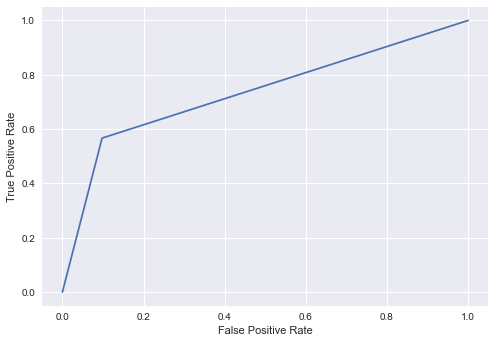

In [202]:
plot_roc_curve(y_test, y_pred)

- Training:Test = 70:30

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [204]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [205]:
lsvc = LinearSVC(random_state=777)
lsvc.fit(X_smote, y_smote)
score = lsvc.score(X_smote, y_smote)
print("Score:", score)

Score: 0.8604718904748033


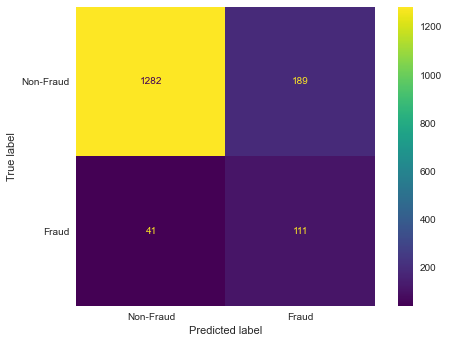

In [206]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Non-Fraud", "Fraud"])

cm_display.plot()
plt.grid(False)
plt.show()

In [207]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1471
           1       0.37      0.73      0.49       152

    accuracy                           0.86      1623
   macro avg       0.67      0.80      0.70      1623
weighted avg       0.91      0.86      0.88      1623



In [208]:
print("AUC Score:", roc_auc_score(y_test,y_pred))

AUC Score: 0.8008895667107946


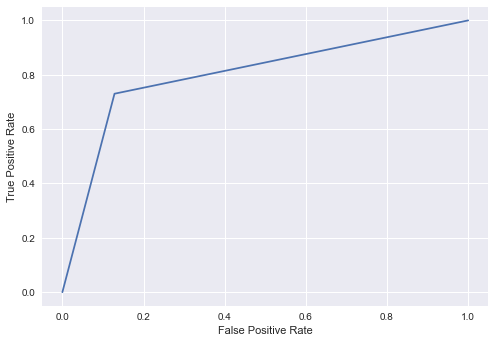

In [209]:
plot_roc_curve(y_test, y_pred)

## LinearSVC Hyperoptimization (All Features)

In [210]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [212]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


### Grid Search

In [213]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 50, 100, 500, 1000],  # Regularization parameter
}

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=LinearSVC(random_state=10820034), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................................C=0.001; total time=   1.9s
[CV] END ............................................C=0.001; total time=   1.7s
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END ............................................C=0.001; total time=   1.6s
[CV] END .............................................C=0.05; total time=   1.6s
[CV] END .............................................C=0.05; total time=   1.6s
[CV] END .............................................C=0.05; total time=   1.7s
[CV] END .............................................C=0.05; total time=   1.6s
[CV] END .............................................C=0.05; total time=   1.7s
[CV] END .............................................C=0.01; total time=   1.8s
[CV] END .......................................

### Random Search

In [214]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
}

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=LinearSVC(random_state=10820034), param_distributions=param_distributions, scoring='roc_auc', n_iter=12, cv=5, verbose=2, random_state=10820034)
random_search.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .............................C=0.006386577563812108; total time=   1.6s
[CV] END .............................C=0.006386577563812108; total time=   1.6s
[CV] END .............................C=0.006386577563812108; total time=   1.6s
[CV] END .............................C=0.006386577563812108; total time=   1.6s
[CV] END .............................C=0.006386577563812108; total time=   1.7s
[CV] END ...............................C=11.058702396175482; total time=   1.7s
[CV] END ...............................C=11.058702396175482; total time=   1.6s
[CV] END ...............................C=11.058702396175482; total time=   1.6s
[CV] END ...............................C=11.058702396175482; total time=   1.6s
[CV] END ...............................C=11.058702396175482; total time=   1.5s
[CV] END ...............................C=0.2965859049037049; total time=   1.6s
[CV] END ...............................C=0.2965

### Bayesian Optimization

In [215]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e+3, 'log-uniform') # Logarithmic scale for C
}

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(LinearSVC(random_state=10820034), search_space, n_iter=12, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 51.85408854484558 seconds
Best hyperparameters: OrderedDict([('C', 0.001762811569195983)])
Best cross-validation score: 0.9266935262901186
AUC Score (Test Data): 0.904267594547211


## LinearSVC Feature Selection (80) & Hyperoptimization

In [216]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [218]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [219]:
# Initialize the SVM classifier
estimator = LinearSVC(random_state=10820034)

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=80)

# Perform RFE to select features
X_selected = rfe.fit_transform(X_smote, y_smote)

In [220]:
# Get the indices of selected features
selected_indices = rfe.get_support(indices=True)

# Subset the test data using the selected indices
X_test_selected = X_test[:, selected_indices]

### Grid Search

In [221]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 50, 100, 500, 1000],  # Regularization parameter
}

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=LinearSVC(random_state=10820034), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................................C=0.001; total time=   0.3s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END .............................................C=0.05; total time=   0.8s
[CV] END .............................................C=0.05; total time=   0.9s
[CV] END .............................................C=0.05; total time=   0.7s
[CV] END .............................................C=0.05; total time=   0.7s
[CV] END .............................................C=0.05; total time=   0.7s
[CV] END .............................................C=0.01; total time=   0.7s
[CV] END .......................................

### Random Search

In [222]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
}

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=LinearSVC(random_state=10820034), param_distributions=param_distributions, scoring='roc_auc', n_iter=12, cv=5, verbose=2, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .............................C=0.006386577563812108; total time=   0.7s
[CV] END .............................C=0.006386577563812108; total time=   0.6s
[CV] END .............................C=0.006386577563812108; total time=   0.7s
[CV] END .............................C=0.006386577563812108; total time=   0.6s
[CV] END .............................C=0.006386577563812108; total time=   0.7s
[CV] END ...............................C=11.058702396175482; total time=   0.8s
[CV] END ...............................C=11.058702396175482; total time=   0.8s
[CV] END ...............................C=11.058702396175482; total time=   0.8s
[CV] END ...............................C=11.058702396175482; total time=   0.8s
[CV] END ...............................C=11.058702396175482; total time=   0.8s
[CV] END ...............................C=0.2965859049037049; total time=   0.7s
[CV] END ...............................C=0.2965

### Bayesian Optimization

In [223]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e+3, 'log-uniform') # Logarithmic scale for C
}


# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(LinearSVC(random_state=10820034), search_space, n_iter=12, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 24.007582902908325 seconds
Best hyperparameters: OrderedDict([('C', 0.8509904056720216)])
Best cross-validation score: 0.9502723226367952
AUC Score (Test Data): 0.8870487316183048


## LinearSVC Feature Selection (50) & Hyperoptimization

In [224]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [226]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [227]:
# Initialize the SVM classifier
estimator = LinearSVC(random_state=10820034)

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=50)

# Perform RFE to select features
X_selected = rfe.fit_transform(X_smote, y_smote)

In [228]:
# Get the indices of selected features
selected_indices = rfe.get_support(indices=True)

# Subset the test data using the selected indices
X_test_selected = X_test[:, selected_indices]

### Grid Search

In [229]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 50, 100, 500, 1000],  # Regularization parameter
}

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=LinearSVC(random_state=10820034), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END .............................................C=0.05; total time=   0.4s
[CV] END .............................................C=0.05; total time=   0.4s
[CV] END .............................................C=0.05; total time=   0.4s
[CV] END .............................................C=0.05; total time=   0.4s
[CV] END .............................................C=0.05; total time=   0.4s
[CV] END .............................................C=0.01; total time=   0.5s
[CV] END .......................................

### Random Search

In [230]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
}

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=LinearSVC(random_state=10820034), param_distributions=param_distributions, scoring='roc_auc', n_iter=12, cv=5, verbose=2, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .............................C=0.006386577563812108; total time=   0.4s
[CV] END .............................C=0.006386577563812108; total time=   0.4s
[CV] END .............................C=0.006386577563812108; total time=   0.4s
[CV] END .............................C=0.006386577563812108; total time=   0.4s
[CV] END .............................C=0.006386577563812108; total time=   0.5s
[CV] END ...............................C=11.058702396175482; total time=   0.6s
[CV] END ...............................C=11.058702396175482; total time=   0.5s
[CV] END ...............................C=11.058702396175482; total time=   0.5s
[CV] END ...............................C=11.058702396175482; total time=   0.5s
[CV] END ...............................C=11.058702396175482; total time=   0.5s
[CV] END ...............................C=0.2965859049037049; total time=   1.0s
[CV] END ...............................C=0.2965

### Bayesian Optimization

In [231]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e+3, 'log-uniform') # Logarithmic scale for C
}


# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(LinearSVC(random_state=10820034), search_space, n_iter=12, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 21.04926562309265 seconds
Best hyperparameters: OrderedDict([('C', 0.8509904056720216)])
Best cross-validation score: 0.9480567338739145
AUC Score (Test Data): 0.9234140756377688


## LinearSVC Feature Selection (20) & Hyperoptimization

In [232]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [234]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [235]:
# Initialize the SVM classifier
estimator = LinearSVC(random_state=10820034)

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=20)

# Perform RFE to select features
X_selected = rfe.fit_transform(X_smote, y_smote)

In [236]:
# Get the indices of selected features
selected_indices = rfe.get_support(indices=True)

# Subset the test data using the selected indices
X_test_selected = X_test[:, selected_indices]

### Grid Search

In [237]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 50, 100, 500, 1000],  # Regularization parameter
}

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=LinearSVC(random_state=10820034), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.05; total time=   0.2s
[CV] END .............................................C=0.05; total time=   0.2s
[CV] END .............................................C=0.05; total time=   0.2s
[CV] END .............................................C=0.05; total time=   0.2s
[CV] END .............................................C=0.05; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .......................................

### Random Search

In [238]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
}

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=LinearSVC(random_state=10820034), param_distributions=param_distributions, scoring='roc_auc', n_iter=12, cv=5, verbose=2, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .............................C=0.006386577563812108; total time=   0.1s
[CV] END .............................C=0.006386577563812108; total time=   0.0s
[CV] END .............................C=0.006386577563812108; total time=   0.1s
[CV] END .............................C=0.006386577563812108; total time=   0.0s
[CV] END .............................C=0.006386577563812108; total time=   0.0s
[CV] END ...............................C=11.058702396175482; total time=   0.2s
[CV] END ...............................C=11.058702396175482; total time=   0.2s
[CV] END ...............................C=11.058702396175482; total time=   0.2s
[CV] END ...............................C=11.058702396175482; total time=   0.2s
[CV] END ...............................C=11.058702396175482; total time=   0.2s
[CV] END ...............................C=0.2965859049037049; total time=   0.2s
[CV] END ...............................C=0.2965

### Bayesian Optimization

In [239]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e+3, 'log-uniform') # Logarithmic scale for C
}


# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(LinearSVC(random_state=10820034), search_space, n_iter=12, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 8.162406206130981 seconds
Best hyperparameters: OrderedDict([('C', 1.5410631435715085)])
Best cross-validation score: 0.9382377358418073
AUC Score (Test Data): 0.9345235965508605


## SVC Hyperoptimization (All Features)

In [240]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [242]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


### RBF Kernel

#### GridSearch

In [243]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto'] # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 581.4747233390808 seconds
Best hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9758253814256108
AUC Score (Test Data): 0.9043816415614155


#### Random Search

In [244]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 594.2133121490479 seconds
Best hyperparameters: {'C': 72.32357858907149, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.975631366669478
AUC Score (Test Data): 0.902485330423271


#### Bayesian Optimization

In [245]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e+3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 656.9777343273163 seconds
Best hyp

### Sigmoid Kernel

#### GridSearch

In [246]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 601.8815929889679 seconds
Best hyperparameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.9089632492849091
AUC Score (Test Data): 0.9182126373036603


#### Random Search

In [247]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 506.13439655303955 seconds
Best hyperparameters: {'C': 0.13789766063603937, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.8988517906006909
AUC Score (Test Data): 0.9063428029625389


#### Bayesian Optimization

In [248]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_smote, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 689.8453722000122 seconds
Best hyp

## SVC Feature Selection (80) & Hyperoptimization

In [249]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [251]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [252]:
# Initialize the SVM classifier
estimator = LinearSVC(random_state=10820034)

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=80)

# Perform RFE to select features
X_selected = rfe.fit_transform(X_smote, y_smote)

In [253]:
# Get the indices of selected features
selected_indices = rfe.get_support(indices=True)

# Subset the test data using the selected indices
X_test_selected = X_test[:, selected_indices]

### RBF Kernel

#### GridSearch

In [254]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto'] # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 223.28761982917786 seconds
Best hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9724592000955837
AUC Score (Test Data): 0.8507415292139254


#### Random Search

In [255]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 234.76013445854187 seconds
Best hyperparameters: {'C': 72.32357858907149, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9716821446869872
AUC Score (Test Data): 0.8529151311317043


#### Bayesian Optimization

In [256]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 248.5742712020874 seconds
Best hyp

### Sigmoid Kernel

#### GridSearch

In [257]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 202.13476538658142 seconds
Best hyperparameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.9313767055919266
AUC Score (Test Data): 0.9313079179934882


#### Random Search

In [258]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 215.20172953605652 seconds
Best hyperparameters: {'C': 0.13789766063603937, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.8378725230922198
AUC Score (Test Data): 0.8222297756628144


#### Bayesian Optimization

In [259]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 275.9538540840149 seconds
Best hyp

## SVC Feature Selection (50) & Hyperoptimization

In [260]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [262]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [263]:
# Initialize the SVM classifier
estimator = LinearSVC(random_state=10820034)

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=50)

# Perform RFE to select features
X_selected = rfe.fit_transform(X_smote, y_smote)

In [264]:
# Get the indices of selected features
selected_indices = rfe.get_support(indices=True)

# Subset the test data using the selected indices
X_test_selected = X_test[:, selected_indices]

### RBF Kernel

#### GridSearch

In [265]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto'] # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 177.6622211933136 seconds
Best hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9665203699355978
AUC Score (Test Data): 0.8496815628466134


#### Random Search

In [266]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 177.4557340145111 seconds
Best hyperparameters: {'C': 72.32357858907149, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9660580631725658
AUC Score (Test Data): 0.8550574260259759


#### Bayesian Optimization

In [267]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 224.0836660861969 seconds
Best hyp

### Sigmoid Kernel

#### GridSearch

In [268]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 160.7701768875122 seconds
Best hyperparameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.9306756644657079
AUC Score (Test Data): 0.9292371820100898


#### Random Search

In [269]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 165.65014624595642 seconds
Best hyperparameters: {'C': 0.13789766063603937, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.8314968696336835
AUC Score (Test Data): 0.8154137894021253


#### Bayesian Optimization

In [270]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 231.98261785507202 seconds
Best hy

## SVC Feature Selection (20) & Hyperoptimization

In [84]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [86]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [87]:
# Initialize the SVM classifier
estimator = LinearSVC(random_state=10820034)

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=20)

# Perform RFE to select features
X_selected = rfe.fit_transform(X_smote, y_smote)

In [88]:
# Get the indices of selected features
selected_indices = rfe.get_support(indices=True)

# Subset the test data using the selected indices
X_test_selected = X_test[:, selected_indices]

### RBF Kernel

#### GridSearch

In [276]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto'] # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 134.8345980644226 seconds
Best hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9496701403530808
AUC Score (Test Data): 0.8036557658592437


#### Random Search

In [277]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 125.83461308479309 seconds
Best hyperparameters: {'C': 72.32357858907149, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9484185090058201
AUC Score (Test Data): 0.8106640666929049


#### Bayesian Optimization

In [278]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 162.0906937122345 seconds
Best hyp

### Sigmoid Kernel

#### GridSearch

In [279]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],  # Regularization parameter
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Grid search with cross-validation
start_time = time.time()  # Record start time
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Total computing time: 99.38761472702026 seconds
Best hyperparameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.9304495692930665
AUC Score (Test Data): 0.9292014025546531


#### Random Search

In [280]:
# Define the parameter grid to search
param_distributions = {
    'C': loguniform(1e-3, 1e3), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create SVM classifier
svc = SVC(probability=True, random_state=10820034)

# Random search with cross-validation
start_time = time.time() # Record start time
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, scoring='roc_auc', n_iter=16, cv=5, verbose=2, n_jobs=-1, random_state=10820034)
random_search.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = random_search.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = random_search.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Total computing time: 101.29069328308105 seconds
Best hyperparameters: {'C': 0.13789766063603937, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation score: 0.8353874646372453
AUC Score (Test Data): 0.8156150488389569


#### Bayesian Optimization

In [281]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e3, 'log-uniform'), # Logarithmic scale for C
    'kernel': ['sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the SVM classifier
svm = SVC(probability=True, random_state=10820034)

# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(svm, search_space, n_iter=16, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 122.22396397590637 seconds
Best hy

## Conclusion

Model terbaik diperoleh oleh SVM Linear hasil optimasi Bayesian dengan 20 fitur.

In [84]:
X = Final_Dataset_Provider_Train.drop(axis=1, columns=['Provider', 'PotentialFraud'])
y = Final_Dataset_Provider_Train["PotentialFraud"]

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_std = robust_scaler.transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, stratify=y, random_state=10820034)

In [86]:
smote = SMOTE(random_state=777)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3433, 1: 354})
Resample dataset shape Counter({0: 3433, 1: 3433})


In [87]:
# Initialize the SVM classifier
estimator = LinearSVC(random_state=10820034)

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=20)

# Perform RFE to select features
X_selected = rfe.fit_transform(X_smote, y_smote)

In [88]:
# Get the indices of selected features
selected_indices = rfe.get_support(indices=True)

# Subset the test data using the selected indices
X_test_selected = X_test[:, selected_indices]

In [89]:
# Define the parameter grid to search
search_space = {
    'C': (1e-3, 1e+3, 'log-uniform') # Logarithmic scale for C
}


# Perform hyperparameter optimization with AUC scoring
start_time = time.time()  # Record start time
opt = BayesSearchCV(LinearSVC(random_state=10820034), search_space, n_iter=12, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2, random_state=10820034)
opt.fit(X_selected, y_smote)
end_time = time.time()  # Record end time

# Compute the total time taken
total_time = end_time - start_time

# Print the total computing time
print("Total computing time:", total_time, "seconds")

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Get the best cross-validation score
best_score = opt.best_score_
print("Best cross-validation score:", best_score)

# Best model from cross-validation
best_model = opt.best_estimator_

# Compute AUC score for test data
y_pred_proba = best_model.decision_function(X_test_selected)
print('AUC Score (Test Data):', roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Total computing time: 12.063306331634521 seconds
Best hyperparameters: OrderedDict([('C', 1.5410631435715085)])
Best cross-validation score: 0.9382377358418073
AUC Score (Test Data): 0.9345235965508605


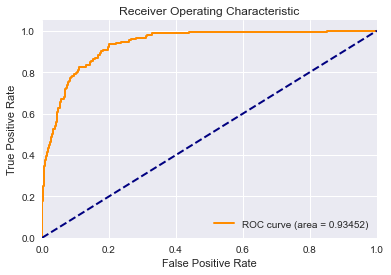

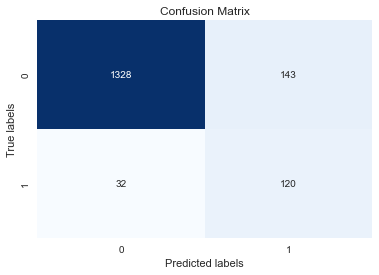

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1471
           1       0.46      0.79      0.58       152

    accuracy                           0.89      1623
   macro avg       0.72      0.85      0.76      1623
weighted avg       0.93      0.89      0.90      1623



In [93]:
# Compute ROC curve and AUC using best cross-validation data
y_pred_proba = best_model.decision_function(X_test_selected)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
y_pred = best_model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))